<a href="https://colab.research.google.com/github/akomaty/CSCI410-lab/blob/master/Lab1/CSCI410_lab1_Linear_Regression_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://edu.epfl.ch/coursebook/en/fundamentals-in-statistical-pattern-recognition-EE-612">
        <img src="https://www.epfl.ch/about/overview/wp-content/uploads/2020/07/logo-epfl-1024x576.png" style="padding-bottom:5px;" width="100" height="56"/>
      Visit the EPFL course page</a></td>
  <td align="center"><a target="_blank" href="https://www.usal.edu.lb/">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxzelk0TseYtdpMaTooDotsxARzYBB_ukJU9KAccb1tST55RDdd_4CLETiNG_qk3fDSRM&usqp=CAU" style="padding-bottom:5px;" width="75" height="75"/>
      Visit the USAL page</a></td>
 
  <td align="center"><a target="_blank" href="https://github.com/akomaty/CSCI410-lab/blob/master/Lab1/CSCI410_lab1_Linear_Regression.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information

In [ ]:
#@title
# Copyright 2021 - All Rights Reserved.
# Idiap Research Institute - Ecole Polytechnique Fédérale de Lausanne EPFL
# Sébastien Marcel and André Anjos.
# CSCI410-University of Sciences and Arts in Lebanon - USAL.
# Ali Komaty.
# © FSPR: Fundamentals in Statistical Pattern Recognition
# https://www.idiap.ch/~marcel/professional/EPFL_FSPR_2019.html
# © USAL CSCI410: Introduction to Machine Learning

# Lab 1: Univariate linear regression using an unvectorized form and gradient descent.
In this lab, you are going to implement the Univariate linear regression from scratch using an (unvectorized) form and gradient descent. Walk through the lab and read the explanation carefully. You will encounter ***TODO*** blocks, follow the instructions to fill them correctly.


## Getting started: Loading the database

First we need to import the modules that we are going to use during this lab:

In [ ]:
import os
import sys
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Now we need to load our dataset from sklearn as follows:

In [ ]:
# load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y = True)
#X = datasets.load_diabetes(return_X_y = False)

In [ ]:
print("The number of samples in the dataset is {}".format(len(X)))

The number of samples in the dataset is 442


In [ ]:
print("The number of features is {}".format(len(X[0])))

The number of features is 10


### Understanding the database
This dataset consists of the following:
First 10 columns (**X**) are numeric predictive values:

* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

Column 11 (**y**) is a quantitative measure of disease progression one year after baseline

Let's plot the Disease progression versus the BMI.


Text(0, 0.5, 'Disease Progression')

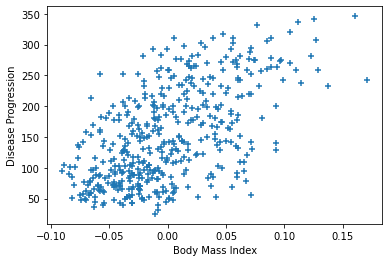

In [ ]:
plt.scatter(X[:,np.newaxis, 2], y, marker='+')
plt.xlabel("Body Mass Index")
plt.ylabel("Disease Progression")

### Splitting the database into training and testing sets

Let's now split the data into training/testing sets. We want to take 50 samples for the test test, and the rest will go to the training set.
Hint: You can use ``X[a:b]`` to split the data

In [ ]:
# Split the data: X
X_train = X[:-50]
X_test = X[-50:]

# Split the target: y
y_train = y[:-50]
y_test = y[-50:]

print("The size of the training data is {}".format(len(X_train)))
print("The size of the test data is {}".format(len(X_test)))

The size of the training data is 392
The size of the test data is 50


Let's choose the BMI feature, we will only work on this feature for now.
Hint: You can use ``X[:, a]`` to select the wanted feature

In [ ]:
X_train = X_train[:, 2]
X_test = X_test[:, 2]

## Start implementing the functions
In this section, we are going to implement the functions to build our linear regression model from scratch.

### The hypothesis function $h_\theta(x)$
We are going to implement a function that calculates the hypothesis $h$ given the set of parameters $\theta4 and a single $x$.

The univariate linear hypothesis :$h_\theta(x)$ is defined as:

$h_\theta(x) = \theta_0 + \theta_1 x$
  
The parameters are:

* **X**: A vector (, list or tuple) containing all observations for the input variable
* **theta**: A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

The function returns the estimated value for y (1 float number).

  

**Hint**:  Use ``theta[0]`` to access $\theta_0$ 

In [ ]:
def h(x, theta):
  return theta[0] + x*theta[1]

### The cost $J$
Now we are going to implement the (unvectorized) cost $J$ for the univariate linear regression model given X, y and $\theta$.
  The cost for the linear regression model is defined as: 
  
  $J(\theta_0, \theta_1) = \frac{1}{2n}\sum_{i=0}^{n-1} (h_\theta(x^{(i)} - y^{(i)})^2$

The parameters are: 


*   **X**: A vector (, list or tuple) containing all observations for the input variable
*   **y**: A vector (, list or tuple) containing all expected values for the output variable
*  **theta**: A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

The function returns the cost for the current input set given the (linear) model.





In [ ]:
def J(X, y, theta):
  J_ = 0.
  n = len(X)
  for i in range(n):
    e_ = h(X[i], theta) - y[i]
    J_ += e_**2
  J_ /= (2*n)
  return J_


### The first partial derivative of the cost function $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

We will now compute the partial derivative of the cost function with respect to $\theta_0$.

As derived in the course, this partial derivative is:

$\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=0}^{n-1} (h_\theta(x^{(i)} - y^{(i)})$
  
The function parameters are:


*   **X**: A vector (, list or tuple) containing all observations for the input variable.
*   **y**: A vector (, list or tuple) containing all expected values for the output variable.
* theta A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

  The function returns the cost for the current input set given the (linear) model.

In [ ]:
def dJ0(X, y, theta):
  dJ0_ = 0
  n = len(X)
  for i in range(n):
    dJ0_ += h(X[i], theta) - y[i]
  dJ0_ /= n
  return dJ0_

### The second partial derivative of the cost function $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$

We will now compute the partial derivative of the cost function with respect to $\theta_1$.

As derived in the course, this partial derivative is:

$\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=0}^{n-1} (h_\theta(x^{(i)} - y^{(i)})x^{(i)})$
  
The function parameters are:


*   **X**: A vector (, list or tuple) containing all observations for the input variable.
*   **y**: A vector (, list or tuple) containing all expected values for the output variable.
* theta A vector (,list or tuple) with two positions with the values of $\theta_0$ and $\theta_1$, in this order.

  The function returns the cost for the current input set given the (linear) model.

In [ ]:
def dJ1(X, y, theta):
  dJ1_ = 0
  n = len(X)
  for i in range(n):
    dJ1_ += (h(X[i], theta) - y[i]) * X[i]
  dJ1_ /= n
  return dJ1_

## Running the algorithm
In this section, we are going to initialize our parameters, then run the experiment.

### Initializing the paramaters

Initialise the parameters using the zeros matrix from numpy.
Note that initialising the parameters have a huge impact of the performance of your algorithm. For example, a small learning rate may not help the system learn at all, while a big learning rate may result in the divergence of the algorithm.

The number of itrations is also important, we may increase the number of iterations to get better results, but we have to pay attention not to overfit our model.

In [ ]:
# initial parameters
theta = np.zeros((2,), dtype='float64')
# Define the maximum number of iterations
max_iter = 2000
# Define the learning rate
alpha = 1.2

Let's do some testing for the hypothesis:

In [ ]:

print("Your h() function should return 1.0 =>", h(1.0, [0.5, 0.5]))
print("Your h() function should return 1.5 =>", h(2.0, [0.5, 0.5]))
print("Your h() function should return 2.0 =>", h(3.0, [0.5, 0.5]))

Jtrain = np.ndarray(max_iter+1)
Jtest = np.ndarray(max_iter+1)
  
Jtrain[0]= J(X_train, y_train, theta)
Jtest[0] = J(X_test, y_test, theta)
print('%03d/%03d: J_train = %.8e | J_devel = %8e' % (0, max_iter, Jtrain[0], Jtest[0]))

Your h() function should return 1.0 => 1.0
Your h() function should return 1.5 => 1.5
Your h() function should return 2.0 => 2.0
000/5000: J_train = 1.45238431e+04 | J_devel = 1.464228e+04


In [ ]:
for t in range(max_iter): 
  # compute the partial derivatives (gradient)
  dJ = [dJ0(X_train, y_train, theta), dJ1(X_train, y_train, theta)]
  # update the parameters
  theta -= np.array(dJ) * alpha

  # compute the cost given the new parameters
  Jtrain[t+1] = J(X_train, y_train, theta)
  Jtest[t+1] = J(X_test, y_test, theta)
  print('%03d/%03d: J_train = %.8e | J_test = %8e' % (t+1, max_iter, Jtrain[t+1], Jtest[t+1]))

  # check for convergence: end-of-accuracy criteria on the train set
  e_ = abs(Jtrain[t] - Jtrain[t+1])
  if(e_ < 1e-08):
    print("Convergence detected (delta J = %.5e). Stopping at iteration %d..." % (abs(Jtrain[t] - Jtrain[t+1]), t+1))
    break

print('Result (after %d iterations):' % (t+1))
#theta[0] = theta[0] - (theta[1]*X_mean)/X_std
#theta[1] /= X_std
print('Final parameters (theta): %s' % theta)

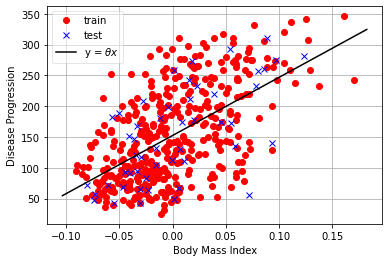

In [ ]:
plt.plot(X_train, y_train, 'ro', label="train")
plt.plot(X_test, y_test, 'bx', label="test")

[x_min, x_max, y_min, y_max] = plt.axis()
x = np.arange(x_min, x_max, (x_max-x_min)/200)
y = [h(k, theta) for k in x]
plt.plot(x, y, "k-", label=r"y = $\theta x$")
plt.xlabel("Body Mass Index")
plt.ylabel("Disease Progression")
leg = plt.legend(loc='best')
leg.get_frame().set_alpha(0.5)
plt.grid()
plt.show()